In [1]:
#include autoreload modules for fast testing and update
%load_ext autoreload
%autoreload 2

#import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sbn
import time

#import modules
from src.data.helper_closed_transactions import read_epex_file, filter_lead_time, extract_transactions
from src.visualization.visualize_transactions import executed_transactions_bar_chart, executed_transactions_heatmap_summary, executed_transactions_time_series

#set maximum columns display pandas
pd.options.display.max_columns = 50

### EPEX Data Processing and Manipulation

Perform a fast load of an new type data file (100000 rows only) and a complete load of an old type data file. As it can be seen loading a complete daily file takes about five minutes (332 seconds)

In [2]:
tic = time.time()
df_new=read_epex_file(
    "../data/external/EPEX_spot_continous_2019/Continuous_Orders_DE_201912_20200130T135223Z/Continuous_Orders_DE_20191201_20200130T135223Z.csv",
    fast_load=False,
    new_data_type=True)
toc = time.time()

In [3]:
print(f'Reading and processing one file (of new type) with new method completely takes {toc-tic} seconds')

Reading and processing one file (of new type) with new method completely takes 18.61378288269043 seconds


In [24]:
tic = time.time()
df=read_epex_file(
    "../data/external/EPEX_spot_continous_2019/DE Continuous Orders 2019-04/DE Continuous Orders 20190403.csv",
    fast_load=False)
toc = time.time()

In [4]:
print(f'Reading and processing one file with new method completely takes {toc-tic} seconds')

Reading and processing one file with new method completely takes 20.36027979850769 seconds


Visualize the tow dataframe

In [7]:
df.tail()

,Order ID,Initial ID,Parent ID,Start Validity Date,End Validity Date,Cancelling Date,Delivery Date,Instrument Type,Delivery Instrument,Is block,Area,Side,Price,Volume,Is Executed,Execution Price,Executed Volume,Executed Price & Volume
1017595,10525113511,10525113511,NaN,2019-10-01 23:39:53.633000+00:00,2019-10-01 23:40:00+00:00,2019-10-01 23:40:00+00:00,2019-10-01 00:00:00+00:00,Quarter Hour,1 days,N,DE-AMP,S,14.90,2.500,0,NaN,0.000,"(nan, 0.0)"
1017596,10525113516,10525112370,1.052511e+10,2019-10-01 23:39:54.269000+00:00,2019-10-01 23:39:54.269000+00:00,NaT,2019-10-01 00:00:00+00:00,Quarter Hour,1 days,N,DE-TPS,B,1000.00,0.225,1,10.0,0.225,"(10.0, 0.225)"
1017597,10525113517,10525113517,NaN,2019-10-01 23:39:54.295000+00:00,2019-10-01 23:40:00+00:00,2019-10-01 23:40:00+00:00,2019-10-01 00:00:00+00:00,Quarter Hour,1 days,N,DE-50Hz,S,25.00,1.750,0,NaN,0.000,"(nan, 0.0)"
1017598,10525113520,10525112546,1.052511e+10,2019-10-01 23:39:54.833000+00:00,2019-10-01 23:39:59.927000+00:00,2019-10-01 23:39:59.927000+00:00,2019-10-01 00:00:00+00:00,Quarter Hour,1 days,N,DE-50Hz,B,-8.65,1.250,0,NaN,0.000,"(nan, 0.0)"
1017599,10525113527,10525106256,1.052511e+10,2019-10-01 23:39:56.439000+00:00,2019-10-01 23:39:59.941000+00:00,2019-10-01 23:39:59.940000+00:00,2019-10-01 00:00:00+00:00,Quarter Hour,1 days,N,DE-TPS,S,26.99,1.250,0,NaN,0.000,"(nan, 0.0)"


In [8]:
df_new.head()

,Order ID,Initial ID,Parent ID,Entry time,Action code,Transaction Time,Validity time,Delivery Start,Delivery End,Product,Delivery area,Market area,Side,Price,Currency,Volume,isOTC,RevisionNo,Is User Defined Block,Execution restriction,Executed Price & Volume
0,10579992705,10579992705,NaN,2019-11-30 22:49:16.391000+00:00,X,2019-11-30 23:00:00.006000+00:00,2019-11-30 23:00:00+00:00,2019-11-30 23:45:00+00:00,2019-12-01 00:00:00+00:00,Intraday_Quarter_Hour_Power,50HzT,DE,Buy,33.20,EUR,0.5,N,2,0,NON,"(33.20, 0.5)"
1,10579992718,10579992718,NaN,2019-11-30 22:49:16.391000+00:00,X,2019-11-30 23:00:00.006000+00:00,2019-11-30 23:00:00+00:00,2019-11-30 23:45:00+00:00,2019-12-01 00:00:00+00:00,Intraday_Quarter_Hour_Power,TTG,DE,Buy,33.20,EUR,0.6,N,2,0,NON,"(33.20, 0.6)"
2,10579992732,10579992732,NaN,2019-11-30 22:49:16.391000+00:00,X,2019-11-30 23:00:00.006000+00:00,2019-11-30 23:00:00+00:00,2019-11-30 23:45:00+00:00,2019-12-01 00:00:00+00:00,Intraday_Quarter_Hour_Power,TNG,DE,Buy,33.20,EUR,0.9,N,2,0,NON,"(33.20, 0.9)"
3,10579998716,10579998716,NaN,2019-11-30 23:00:00.122000+00:00,A,2019-11-30 23:00:00.122000+00:00,NaT,2019-11-30 23:45:00+00:00,2019-12-01 00:00:00+00:00,Intraday_Quarter_Hour_Power,TTG,DE,Sell,34.59,EUR,7.4,N,1,0,NON,"(34.59, 7.4)"
4,10579986107,10579986107,NaN,2019-11-30 22:39:54.333000+00:00,D,2019-11-30 23:00:00.149000+00:00,NaT,2019-11-30 23:30:00+00:00,2019-11-30 23:45:00+00:00,Intraday_Quarter_Hour_Power,TTG,DE,Buy,30.58,EUR,2.0,N,2,0,NON,"(30.58, 2.0)"


In [9]:
df_new[df_new['Order ID']==10579998872]

,Order ID,Initial ID,Parent ID,Entry time,Action code,Transaction Time,Validity time,Delivery Start,Delivery End,Product,Delivery area,Market area,Side,Price,Currency,Volume,isOTC,RevisionNo,Is User Defined Block,Execution restriction,Executed Price & Volume,lead_time
382,10579998872,10579990676,1.058000e+10,2019-11-30 23:00:09.801000+00:00,A,2019-11-30 23:00:09.801000+00:00,NaT,2019-11-30 23:45:00+00:00,2019-12-01 00:00:00+00:00,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.94,EUR,4.9,N,1,0,NON,"(33.94, 4.9)",0 days 00:44:50.199000
626,10579998872,10579990676,1.058000e+10,2019-11-30 23:00:09.801000+00:00,P,2019-11-30 23:00:25.567000+00:00,NaT,2019-11-30 23:45:00+00:00,2019-12-01 00:00:00+00:00,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.94,EUR,3.1,N,2,0,NON,"(33.94, 3.1)",0 days 00:44:34.433000
629,10579998872,10579990676,1.058000e+10,2019-11-30 23:00:09.801000+00:00,P,2019-11-30 23:00:25.889000+00:00,NaT,2019-11-30 23:45:00+00:00,2019-12-01 00:00:00+00:00,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.94,EUR,2.3,N,3,0,NON,"(33.94, 2.3)",0 days 00:44:34.111000
866,10579998872,10579990676,1.058000e+10,2019-11-30 23:00:09.801000+00:00,D,2019-11-30 23:00:56.464000+00:00,NaT,2019-11-30 23:45:00+00:00,2019-12-01 00:00:00+00:00,Intraday_Quarter_Hour_Power,AMP,DE,Buy,33.94,EUR,2.3,N,4,0,NON,"(33.94, 2.3)",0 days 00:44:03.536000


Filter the data to only include matched or partially matched transactions (Executed) and manipulate it to obtain a usable data format for analysis purposes.

In [3]:
df_filtered_new=filter_lead_time(df_new, new_data_type=True)

In [7]:
df_filtered=filter_lead_time(df)

In [8]:
pivoted, pivoted_levels=extract_transactions(df_filtered, new_data_type=False)

In [4]:
pivoted_new, pivoted_levels_new=extract_transactions(df_filtered_new, new_data_type=True)

Visualize the transactions

Some observations:

1) As it can be seen below the derivation of the transactions using the **old data type** format:

- we can match orders if, given the ```End Validity Date``` is the same, the ```Execution Price``` and the ```Executed Volume``` for buy and sell orders are the same, unless there no contract close at the same time with the condition being equal.

- it can be seen from above some transactions cannot be matched to their pair since the data include only the German settled contracts


2) As it can be seen below the derivation of the transactions using the **new data type** format is not straightforward at all. The following are the issues:

- there is no clear way to define the Execution Price of a transaction
- orders which partially matched are shown without showing the actual partial volume which is matched, but instead the initial total volume. Cmpleted matched transactions are reported to have a 0 volume meaning that to know the volume matched one should look at the initial value of the order when it was added (A) to the the order book.


In [9]:
pivoted.tail(7)

Executed Volume  \
End Validity Date                Executed Price & Volume Delivery Start            Side                   
2019-10-01 23:28:53.925000+00:00 (19.34, 1.25)           2019-10-02 00:00:00+00:00 S               1.25   
2019-10-01 23:28:54.099000+00:00 (20.0, 1.25)            2019-10-02 00:00:00+00:00 B               1.25   
                                                                                   S               1.25   
2019-10-01 23:28:54.101000+00:00 (20.0, 1.25)            2019-10-02 00:00:00+00:00 B               1.25   
                                                                                   S               1.25   
2019-10-01 23:30:01.519000+00:00 (20.0, 0.075)           2019-10-02 00:00:00+00:00 B              0.075   
2019-10-01 23:36:51.952000+00:00 (19.8, 1.25)            2019-10-02 00:00:00+00:00 B               1.25   

                                                                                        Execution Price  \
End Validity Date                Executed Price & Volume Delivery Start            Side                   
2019-10-01 23:28:53.925000+00:00 (19.34, 1.25)           2019-10-02 00:00:00+00:00 S              19.34   
2019-10-01 23:28:54.099000+00:00 (20.0, 1.25)            2019-10-02 00:00:00+00:00 B                 20   
                                                                                   S                 20   
2019-10-01 23:28:54.101000+00:00 (20.0, 1.25)            2019-10-02 00:00:00+00:00 B                 20   
                                                                                   S                 20   
2019-10-01 23:30:01.519000+00:00 (20.0, 0.075)           2019-10-02 00:00:00+00:00 B                 20   
2019-10-01 23:36:51.952000+00:00 (19.8, 1.25)            2019-10-02 00:00:00+00:00 B               19.8   

                                                                                          Initial ID  \
End Validity Date                Executed Price & Volume Delivery Start            Side                
2019-10-01 23:28:53.925000+00:00 (19.34, 1.25)           2019-10-02 00:00:00+00:00 S     10525106213   
2019-10-01 23:28:54.099000+00:00 (20.0, 1.25)            2019-10-02 00:00:00+00:00 B     10525085231   
                                                                                   S     10525106214   
2019-10-01 23:28:54.101000+00:00 (20.0, 1.25)            2019-10-02 00:00:00+00:00 B     10525085231   
                                                                                   S     10525106215   
2019-10-01 23:30:01.519000+00:00 (20.0, 0.075)           2019-10-02 00:00:00+00:00 B     10525085231   
2019-10-01 23:36:51.952000+00:00 (19.8, 1.25)            2019-10-02 00:00:00+00:00 B     10525099827   

                                                                                        Instrument Type  \
End Validity Date                Executed Price & Volume Delivery Start            Side                   
2019-10-01 23:28:53.925000+00:00 (19.34, 1.25)           2019-10-02 00:00:00+00:00 S       Quarter Hour   
2019-10-01 23:28:54.099000+00:00 (20.0, 1.25)            2019-10-02 00:00:00+00:00 B       Quarter Hour   
                                                                                   S       Quarter Hour   
2019-10-01 23:28:54.101000+00:00 (20.0, 1.25)            2019-10-02 00:00:00+00:00 B       Quarter Hour   
                                                                                   S       Quarter Hour   
2019-10-01 23:30:01.519000+00:00 (20.0, 0.075)           2019-10-02 00:00:00+00:00 B       Quarter Hour   
2019-10-01 23:36:51.952000+00:00 (19.8, 1.25)            2019-10-02 00:00:00+00:00 B       Quarter Hour   

                                                                                        Is Executed  \
End Validity Date                Executed Price & Volume Delivery Start            Side               
2019-10-01 23:28:53.925000+00:00 (19.34, 1.25)       

In [5]:
pivoted_new.head(10)

Action code  \
Transaction Time                 Executed Price & Volume Side               
2019-11-30 23:00:00.876000+00:00 (33.40, 0.0)            Sell           M   
                                 (33.40, 0.7)            Sell           P   
                                 (33.93, 5.9)            Buy            P   
                                 (34.22, 0.0)            Buy            M   
2019-11-30 23:00:00.881000+00:00 (33.40, 0.0)            Sell           M   
                                 (33.93, 5.1)            Buy            P   
2019-11-30 23:00:25.567000+00:00 (33.60, 0.0)            Sell           M   
                                 (33.94, 3.1)            Buy            P   
2019-11-30 23:00:25.889000+00:00 (33.60, 0.0)            Sell           M   
                                 (33.94, 2.3)            Buy            P   

                                                                                    Entry time  \
Transaction Time                 Executed Price & Volume Side                                    
2019-11-30 23:00:00.876000+00:00 (33.40, 0.0)            Sell 2019-11-30 23:00:00.876000+00:00   
                                 (33.40, 0.7)            Sell 2019-11-30 23:00:00.876000+00:00   
                                 (33.93, 5.9)            Buy  2019-11-30 22:59:42.283000+00:00   
                                 (34.22, 0.0)            Buy  2019-11-30 22:57:29.604000+00:00   
2019-11-30 23:00:00.881000+00:00 (33.40, 0.0)            Sell 2019-11-30 23:00:00.881000+00:00   
                                 (33.93, 5.1)            Buy  2019-11-30 22:59:42.283000+00:00   
2019-11-30 23:00:25.567000+00:00 (33.60, 0.0)            Sell 2019-11-30 23:00:25.567000+00:00   
                                 (33.94, 3.1)            Buy  2019-11-30 23:00:09.801000+00:00   
2019-11-30 23:00:25.889000+00:00 (33.60, 0.0)            Sell 2019-11-30 23:00:25.889000+00:00   
                                 (33.94, 2.3)            Buy  2019-11-30 23:00:09.801000+00:00   

                                                              Execution restriction  \
Transaction Time                 Executed Price & Volume Side                         
2019-11-30 23:00:00.876000+00:00 (33.40, 0.0)            Sell                   IOC   
                                 (33.40, 0.7)            Sell                   IOC   
                                 (33.93, 5.9)            Buy                    NON   
                                 (34.22, 0.0)            Buy                    NON   
2019-11-30 23:00:00.881000+00:00 (33.40, 0.0)            Sell                   IOC   
                                 (33.93, 5.1)            Buy                    NON   
2019-11-30 23:00:25.567000+00:00 (33.60, 0.0)            Sell                   IOC   
                                 (33.94, 3.1)            Buy                    NON   
2019-11-30 23:00:25.889000+00:00 (33.60, 0.0)            Sell                   IOC   
                                 (33.94, 2.3)            Buy                    NON   

                                                                Initial ID  \
Transaction Time                 Executed Price & Volume Side                
2019-11-30 23:00:00.876000+00:00 (33.40, 0.0)            Sell  10579997851   
                                 (33.40, 0.7)            Sell  10579997851   
                                 (33.93, 5.9)            Buy   10579998619   
                                 (34.22, 0.0)            Buy   10579997296   
2019-11-30 23:00:00.881000+00:00 (33.40, 0.0)            Sell  10579998723   
                                 (33.93, 5.1)            Buy   10579998619   
2019-11-30 23:00:25.567000+00:00 (33.60, 0.0)            Sell  10579999034   
                                 (33.94, 3.1)            Buy   10579990676   
2019-11-30 23:00:25.889000+00:00 (33.60, 0.0)            Sell  10579999035   
                                 (33.94, 2.3)            

### Visualizations and Statistics

Trades Execution heat map in the time window of interest

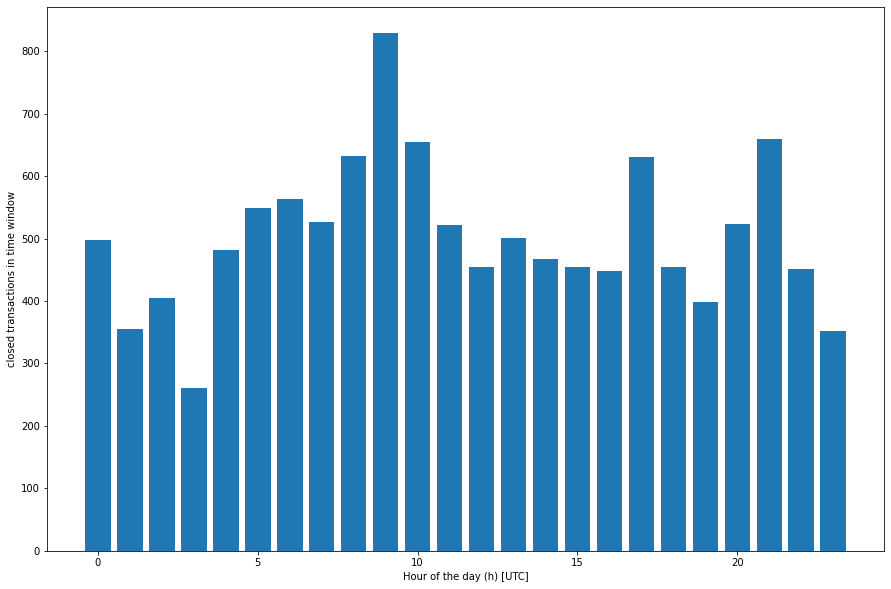

In [16]:
l=executed_transactions_bar_chart(pivoted_levels)

Visualize daily heatmap summary for executed transactions in the time window of interest

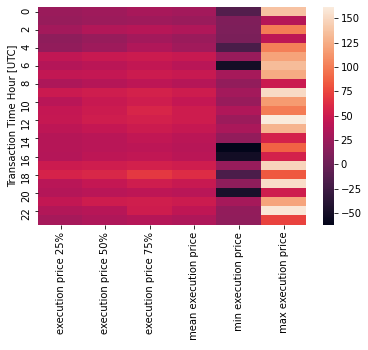

In [17]:
daily_execution_price_stat, daily_execution_volume_stat=executed_transactions_heatmap_summary(pivoted_levels)

Visualize contract prices and volumes in time of executed transactions and welfare indicators in the time window of interest

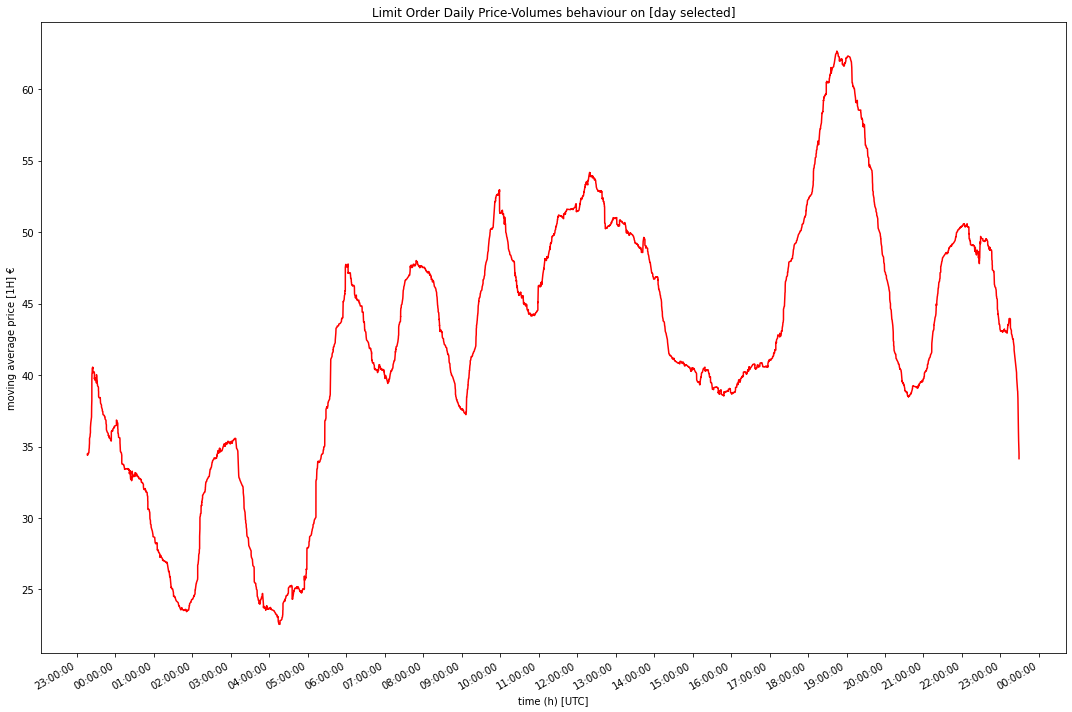

In [19]:
# [exec_price, exec_volume, moving_avg_exec_price, moving_avg_exec_volume, moving_max_price, moving_min_price]
time, outputseries=executed_transactions_time_series(pivoted_levels, output_series_='moving_avg_exec_price')